# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [45]:
%matplotlib inline
import pandas as pd

# filename = "Sacramentorealestatetransactions.csv"

df = pd.read_csv('/Users/smoot/Downloads/Sacramentorealestatetransactions.csv')

df.head(1)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

In [ ]:
# df.info

In [ ]:
# sns.pairplot(df, 'price')

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

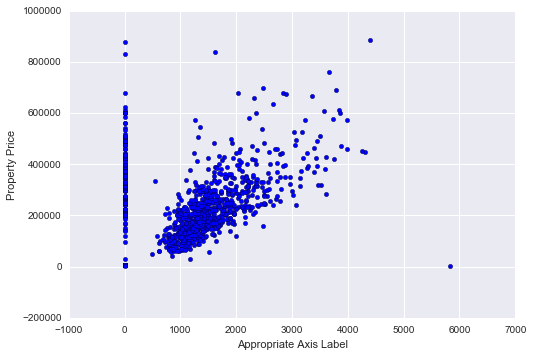

In [44]:
import seaborn as sns
from matplotlib import pyplot as plt

x = df[['sq__ft']]
y = df['price']

plt.scatter(x, y)
plt.xlabel("Appropriate Axis Label")
plt.ylabel("Property Price")
plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

In [43]:
from sklearn import linear_model
import statsmodels.api as sm

In [23]:
df[ df['sq__ft'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378


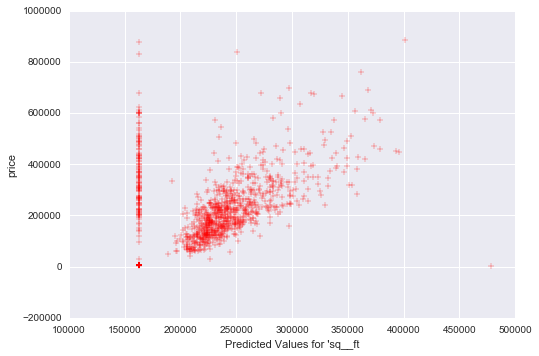

MSE: 16993401954.2


In [42]:
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()

X = df[['sq__ft']]
y = df['price']

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel('Predicted Values for \'sq__ft')
plt.ylabel("price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [27]:
df['zip'] = df['zip'].astype('category')

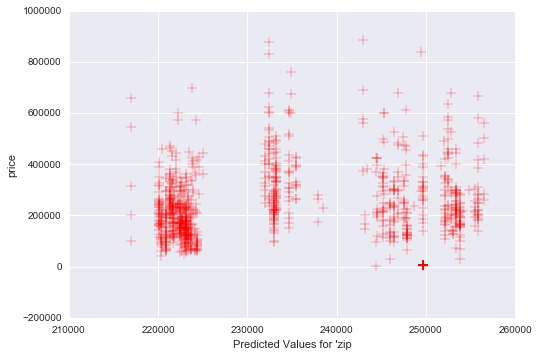

MSE: 18958993656.4


In [41]:
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()

X = df[['zip']]
y = df['price']

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(predictions, y, s=90, c='r', marker='+', zorder=10)
plt.xlabel('Predicted Values for \'zip')
plt.ylabel("price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

AttributeError: 'DataFrame' object has no attribute 'summary'